In [7]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from src import helpers

In [8]:
n = 10_000
a = torch.ones(n)
b = torch.ones(n)


In [10]:
c = torch.zeros(n)
timer = helpers.Timer()
for i in range(n):
    c[i] = a[i]+b[i]
print(f"took {timer.stop():.5f} seconds")

took 0.09684 seconds


In [11]:
timer.start()
d = a+b
print(f"took {timer.stop():.5f} seconds")

took 0.00054 seconds


In [12]:
## NORMAL Distribution
## Linear Regression & Normal Distr. (aka Gaussian distr.) was both invented by Gauss in 1795

def normal(x, mu, sigma):
    p = 1 / math.sqrt(2*math.pi*sigma**2)
    return p * np.exp(-((x-mu)**2)/(2*sigma**2))

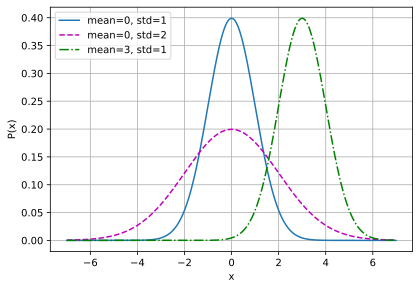

In [14]:
## use numpy for visualization
x = np.arange(-7, 7, 0.01)

## mean and std pairs
params = [(0,1), (0,2), (3,1)]
helpers.plot(
    x, 
    [normal(x, mu, sigma) for mu, sigma in params],
    xlabel="x",
    ylabel="P(x)",
    figsize=(6.5, 4.5),
    legend=[f"mean={mu}, std={sigma}" for mu, sigma in params]
)

